import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class_size_dict = { "Class_Size":[7,12,17,22,27,32,37,42,47],'No_of_Class':[8,8,14,4,6,12,8,3,2]}
Class_Size = pd.DataFrame(class_size_dict)    

In [1]:
Class_Size

NameError: name 'Class_Size' is not defined

# Exercise  3.1

In [ ]:
Class_Size['Total_Student'] = Class_Size['Class_Size']*Class_Size['No_of_Class']

In [ ]:
total_student_population = Class_Size['Total_Student'].sum()
total_class = Class_Size['No_of_Class'].sum()

In [ ]:
avg_no_of_student_per_class = total_student_population / total_class

In [ ]:
print('Average Number of student per class as per Dean Perspective = ' + str(avg_no_of_student_per_class))

In [ ]:
Class_Size['PMF'] = Class_Size['No_of_Class'] / total_class

In [ ]:
Class_Size

In [ ]:
Class_Size.plot(x = 'Class_Size',y = 'PMF',kind = 'bar',figsize = (15,8))
plt.title('Distribution of class size as perceived by Dean')
plt.ylabel('Probability')
plt.xlabel('Class Size')
plt.show()

In [ ]:
cs = list(Class_Size['Class_Size'])
ts = list((Class_Size['Total_Student']))

In [ ]:
population = []
for c,t in zip(cs,ts):
    for i in range(t):
        population.append(c)


In [ ]:
import random
sample = random.sample(population,int(len(population)/10))

In [ ]:
print('Average Number of student per class as per Student Perspective = ' + str(sum(sample)/len(sample)))

In [ ]:
sample_df = pd.DataFrame({'Class_Size': sample})

In [ ]:
sample_hist = pd.DataFrame(sample_df['Class_Size'].value_counts().sort_index()).reset_index()
sample_hist.columns = ['Class_Size','No_of_Class']
sample_hist['PMF'] = sample_hist['No_of_Class']/sample_hist['No_of_Class'].sum()
sample_hist

In [ ]:
sample_hist.plot(x = 'Class_Size',y = 'PMF', kind ='bar',figsize = (15,6))
plt.title('Distribution of class size as perceived by Student')
plt.ylabel('Probability')
plt.xlabel('Class Size')
plt.show()

# The limits of PMFs

In [2]:
import pandas as pd
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])


In [3]:
pregnancies
first_child = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] == 1)][['birthwgt_lb', 'birthwgt_oz']].dropna()
other = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] != 1)][['birthwgt_lb', 'birthwgt_oz']].dropna()

# Exercise 3.5

In [4]:
first_child

,birthwgt_lb,birthwgt_oz
0,8.0,13.0
2,9.0,2.0
5,8.0,9.0
8,7.0,9.0
10,7.0,13.0
...,...,...
13576,6.0,7.0
13578,6.0,0.0
13581,6.0,6.0
13584,6.0,6.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
bins =  int(max(first_child['birthwgt_lb'].max(), other['birthwgt_lb'].max()) - min(first_child['birthwgt_lb'].min() , other['birthwgt_lb'].min()))
fig,ax = plt.subplots(figsize =(15,7))
sns.distplot(first_child['birthwgt_lb'],bins = bins,kde=True, norm_hist=True,hist = False,hist_kws={"alpha": 0.3, 'cumulative': True},ax = ax)
sns.distplot(other['birthwgt_lb'],bins = bins,kde=False, norm_hist=True, hist_kws={"alpha": 0.3, 'cumulative': True},ax = ax)
plt.show()


<Figure size 1500x700 with 1 Axes>

In [6]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [7]:
from empiricaldist import Cdf

In [8]:
firstbaby = first_child['birthwgt_lb']*16 + first_child['birthwgt_oz']
other = other['birthwgt_lb']*16 + other['birthwgt_oz']

In [10]:
df1 = Cdf.from_seq(firstbaby)
df2 = Cdf.from_seq(other)

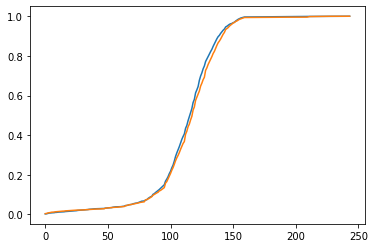

In [11]:
df1.plot()
df2.plot()

AttributeError: 'Cdf' object has no attribute 'box'

In [19]:
df1.forward(150.75)

array(0.96758731)

In [20]:
df1(150.75)

array(0.96758731)

In [21]:
df1.inverse(0.75)

array(128.)

In [24]:
df1_sample = df1.sample(n=1000, replace=True)

In [ ]:
df3 = Cdf()